# Simulation Modeling of a Gas Station

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("mm.mplstyle")

In [2]:
n_days = 365

In [3]:
demand_mean = 1500
demand_std = 200
demands = np.random.randn(n_days) * demand_std + demand_mean
demands = np.maximum(0, demands)

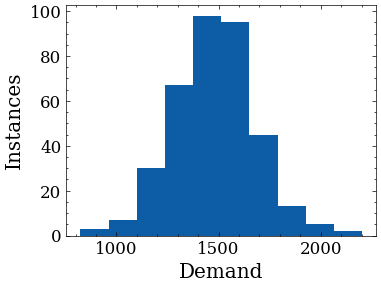

In [4]:
plt.hist(demands)
plt.xlabel("Demand")
plt.ylabel("Instances")
plt.show()

In [5]:
delivery_cost = 50000
storage_cost = 1

In [6]:
def simulate(interval, demands, plot=False):
    delivery = demand_mean * interval
    storage = 0
    storage_list = [storage]
    cost = 0
    unsatisfied_demand = 0
    for i, demand in enumerate(demands):
        if i % interval == 0:
            storage += delivery
            cost += delivery_cost
        if storage >= demand:
            storage -= demand
        else:
            unsatisfied_demand += demand
        cost += storage * storage_cost
        storage_list.append(storage)
    if plot:
        plt.plot(storage_list)
        plt.xlabel("Day")
        plt.ylabel("Storage")
    return cost / n_days, unsatisfied_demand / n_days

(np.float64(14816.398310678465), np.float64(2.8604863255211757))

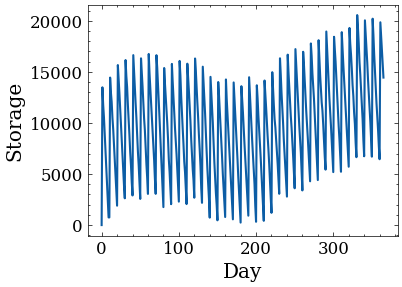

In [7]:
simulate(10, demands, plot=True)

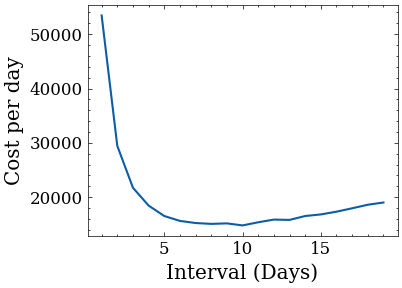

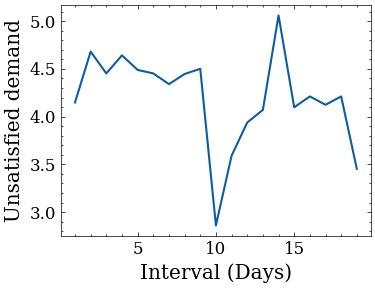

In [8]:
cost_list = []
ud_list = []  # unsatisfied demand
intervals = list(range(1, 20))
for interval in intervals:
    cost, ud = simulate(interval, demands)
    cost_list.append(cost)
    ud_list.append(ud)
    
plt.plot(intervals, cost_list)
plt.xlabel("Interval (Days)")
plt.ylabel("Cost per day")
plt.show()

plt.plot(intervals, ud_list)
plt.xlabel("Interval (Days)")
plt.ylabel("Unsatisfied demand")
plt.show()

In [9]:
# theoretical best interval
np.sqrt(2 * delivery_cost / storage_cost / demand_mean)

np.float64(8.16496580927726)